In [1]:
import nibabel as nib
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train_path_r = "/home/myi16/jsr_Y/new_flow"
test_path_r = "/mnt/blackhole-data2/RadOnc_Brain/Validation"

runze_path = "/mnt/blackhole-data2/RadOnc_Brain/NonRigid_Training_CBCT"

train_path_h = "/mnt/blackhole-data2/HeadScanner/MRCBCT/training" 
test_path_h = "/mnt/blackhole-data2/HeadScanner/MRCBCT/testing"

In [3]:
from dataloader import RadOncTrainingDataset, RadOncValidationDataset
valid_dataset = RadOncValidationDataset(test_path_r, num_samples=None, supervision=True,
                                            return_segmentation=True)


In [17]:
data = valid_dataset[0]
print(data[0].shape)

torch.Size([1, 1, 128, 160, 128])


In [4]:
name = 'new_060.npz'
name2 = '001.npz'


In [29]:
for item in valid_dataset[0]:
    print(item.max(),item.min())

tensor(1.) tensor(0.)
tensor(0.5366) tensor(0.0301)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(True) tensor(False)
tensor(True) tensor(False)


In [9]:
data_train_r = np.load(train_path_r+'/010.npz',allow_pickle=True)
# data_train_r = valid_dataset[0]
for key in data_train_r.keys():
    print(key)
    
    # if key !='sources':
    print(data_train_r[key].shape)
    print(type(data_train_r[key]))
    # else:
    #     for source in data_train_r['sources']:
    #         print(source)

fixed_img
(128, 160, 128)
<class 'numpy.ndarray'>
moving_img
(128, 160, 128)
<class 'numpy.ndarray'>
fixed_warp
(128, 160, 128)
<class 'numpy.ndarray'>
moving_truth
(128, 160, 128)
<class 'numpy.ndarray'>
ventricle_fixed
(128, 160, 128)
<class 'numpy.ndarray'>
ventricle_moving
(128, 160, 128)
<class 'numpy.ndarray'>
affine
(4, 4)
<class 'numpy.ndarray'>
flow
(1, 3, 128, 160, 128)
<class 'numpy.ndarray'>
cbct
(128, 160, 128)
<class 'numpy.ndarray'>
cbct_warp
(128, 160, 128)
<class 'numpy.ndarray'>


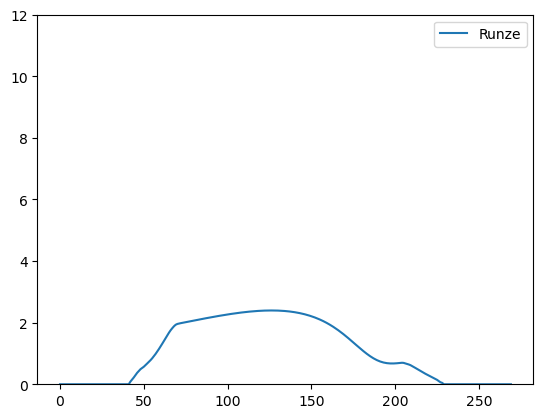

In [29]:
flow_runze = data_train_r['flow']
dist  = ((0.7*flow_runze[0,:,:,:,0])**2+(0.7*flow_runze[0,:,:,:,1])**2+(flow_runze[0,:,:,:,2])**2)**0.5
prof2_runze = dist[:,200,100]
plt.ylim([0,12])
plt.plot(prof2_runze,label = 'Runze')
plt.legend()

In [27]:
flow_runze.shape

(1, 270, 341, 183, 3)

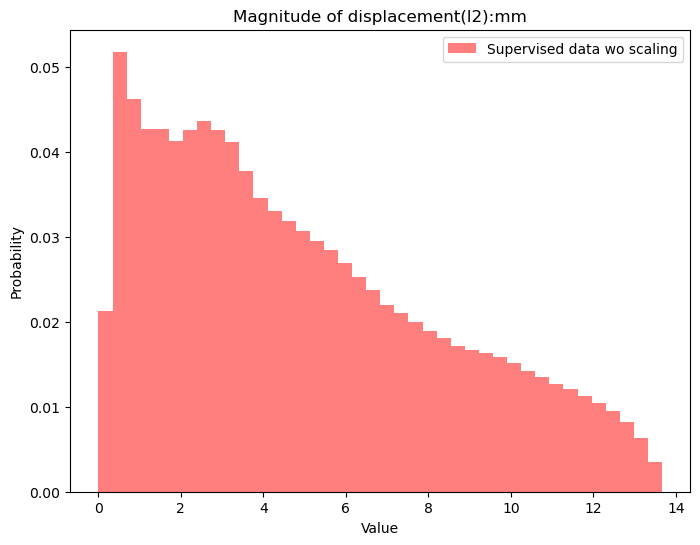

In [12]:
flow = data_train_r['flow']
data = ((flow[0,:,:,:,0]*0.7)**2+(flow[0,:,:,:,1]*0.7)**2+(flow[0,:,:,:,0])**2)**0.5
mag_list = data.flatten().tolist()
mag_list = [x for x in mag_list if x!=0.0]
weights = np.ones_like(mag_list)/len(mag_list)

plt.figure(figsize=(8, 6))

# 绘制两组数据的直方图
plt.hist(mag_list, bins=40, alpha=0.5, color='red', label = 'Supervised data wo scaling',weights=weights)

# 添加标签和图例
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Magnitude of displacement(l2):mm')
plt.legend()

# 显示图形
plt.show()

In [10]:
data_train_r = np.load(train_path_r+'/'+name2,allow_pickle=True)
# data_train_r = valid_dataset[0]
for key in data_train_r.keys():
    print(key)
    if key !='sources':
        print(data_train_r[key].shape)
        print(type(data_train_r[key]))

fixed_img
(128, 160, 128)
<class 'numpy.ndarray'>
moving_img
(128, 160, 128)
<class 'numpy.ndarray'>
fixed_warp
(128, 160, 128)
<class 'numpy.ndarray'>
moving_truth
(128, 160, 128)
<class 'numpy.ndarray'>
ventricle_fixed
(128, 160, 128)
<class 'numpy.ndarray'>
ventricle_moving
(128, 160, 128)
<class 'numpy.ndarray'>
affine
(4, 4)
<class 'numpy.ndarray'>
flow
(3, 128, 160, 128)
<class 'numpy.ndarray'>
sources
cbct
(128, 160, 128)
<class 'numpy.ndarray'>
cbct_warp
(128, 160, 128)
<class 'numpy.ndarray'>
index
()
<class 'numpy.ndarray'>


In [6]:
def dataread(data_dict):
    fixed_img = data_dict['fixed_img']
    moving_img = data_dict['moving_img']
    fixed_warp = data_dict['fixed_warp']
    moving_truth = data_dict['moving_truth']
    ventricle_fixed = data_dict['ventricle_fixed']
    ventricle_moving = data_dict['ventricle_moving']
    affine = data_dict['affine']
    flow = data_dict['flow']
    cbct = data_dict['cbct']
    cbct_warp = data_dict['cbct_warp']
    return fixed_img,moving_img,fixed_warp,moving_truth,ventricle_fixed,ventricle_moving,affine,flow,cbct,cbct_warp

In [7]:
fixed_img,moving_img,fixed_warp,moving_truth,ventricle_fixed,ventricle_moving,affine,flow,cbct,cbct_warp = dataread(data_train_r)
cbct_fixed = cbct
mr_moving = moving_img
ct_fixed = fixed_img
ct_moving = fixed_warp
seg_fixed = ventricle_fixed
seg_moving = ventricle_moving
mr_gt = moving_truth

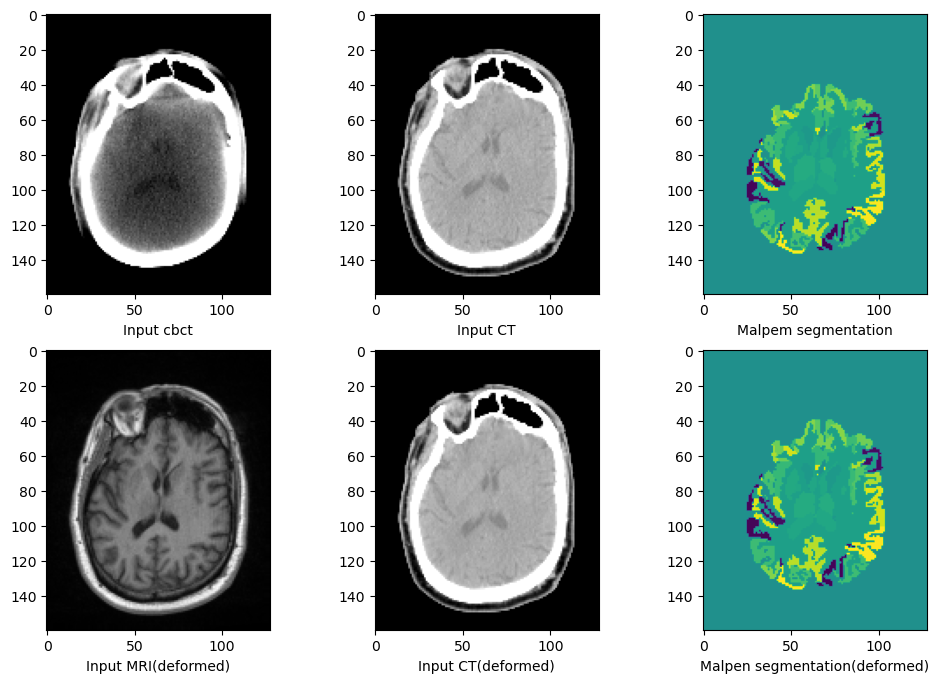

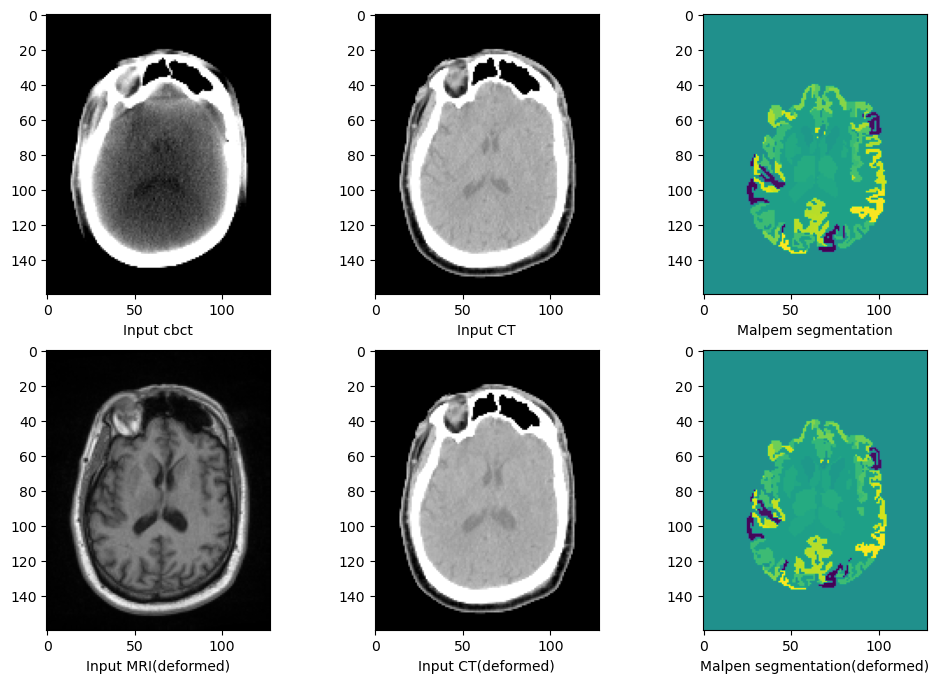

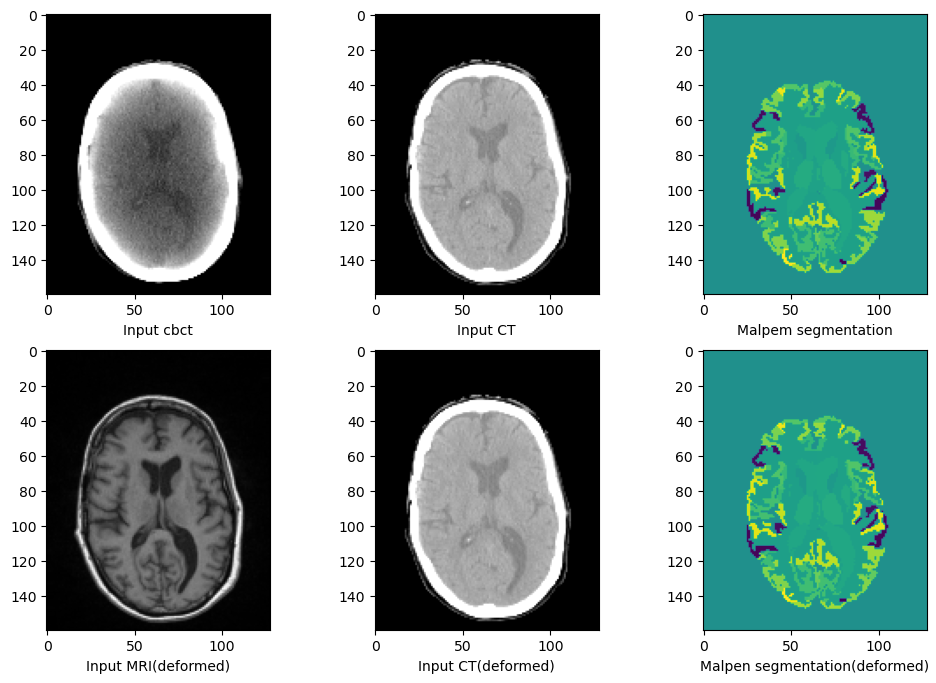

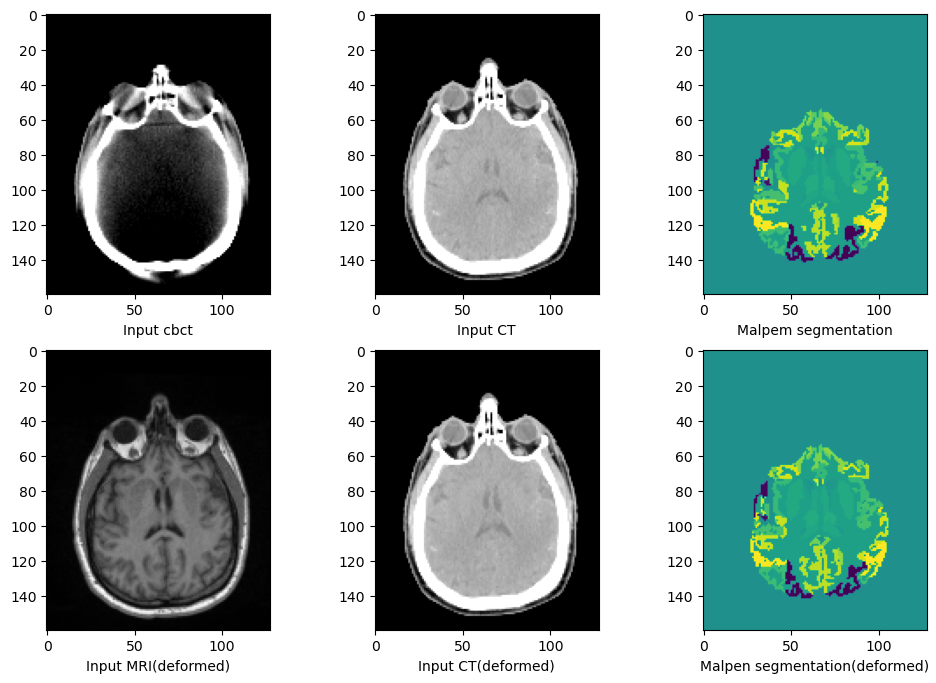

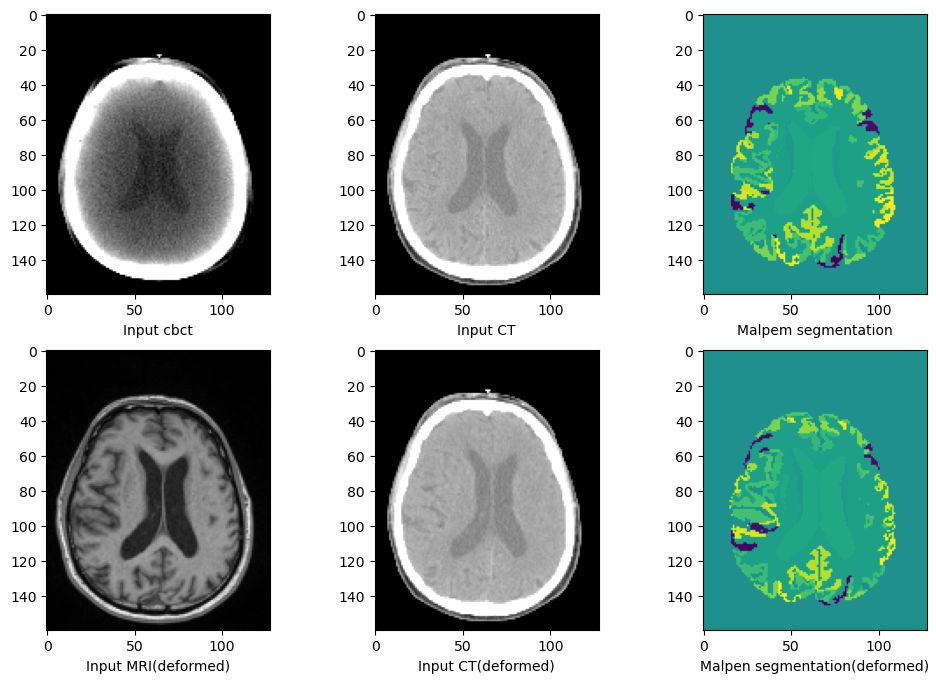

In [17]:
for i in range(50,55):
    fixed_img,moving_img,fixed_warp,moving_truth,ventricle_fixed,ventricle_moving,affine,flow,cbct,cbct_warp = dataread(np.load(runze_path+'/'+f"{i:03}.npz",allow_pickle=True))
    # fixed_img,moving_img,fixed_warp,moving_truth,ventricle_fixed,ventricle_moving,affine,flow,cbct,cbct_warp = valid_dataset[i]
    cbct_fixed = cbct
    mr_moving = moving_img
    ct_fixed = fixed_img
    ct_moving = fixed_warp
    seg_fixed = ventricle_fixed
    seg_moving = ventricle_moving
    mr_gt = moving_truth
    fig, ax = plt.subplots(2,3,figsize=(12,8))
    ax[0][0].imshow(cbct_fixed[:,:,72].T, cmap='gray')
    ax[0][0].set_xlabel('Input cbct')
    ax[1][0].imshow(mr_moving[:,:,72].T, cmap='gray')
    ax[1][0].set_xlabel('Input MRI(deformed)')

    ax[0][1].imshow(ct_fixed[:,:,72].T, cmap='gray')
    ax[0][1].set_xlabel('Input CT')
    ax[1][1].imshow(ct_moving[:,:,72].T, cmap='gray')
    ax[1][1].set_xlabel('Input CT(deformed)')

    ax[0][2].imshow(seg_fixed[:,:,72].T)
    ax[0][2].set_xlabel('Malpem segmentation')
    ax[1][2].imshow(seg_moving[:,:,72].T)
    ax[1][2].set_xlabel('Malpen segmentation(deformed)')
    plt.show()


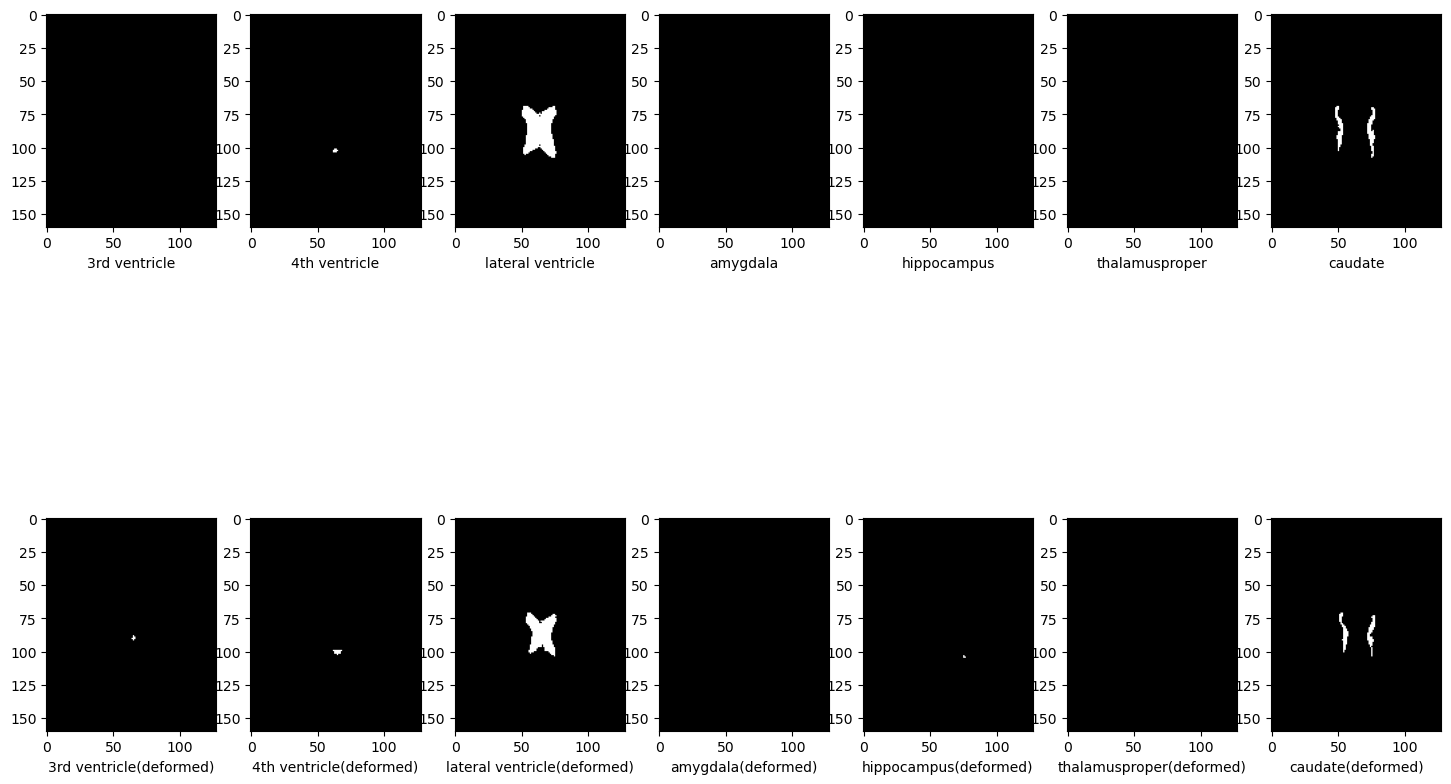

In [15]:
num = len(mask_val)
slice = [65,40,72,72,55,72,72]
label = ['3rd ventricle','4th ventricle','lateral ventricle','amygdala','hippocampus','thalamusproper','caudate']
fig, ax = plt.subplots(2,num,figsize=(18,12))
for i in range(num):
    islice = slice[i]
    ax[0][i].imshow(mask_fixed[i,:,:,islice].T, cmap='gray')
    ax[0][i].set_xlabel(label[i])
    ax[1][i].imshow(mask_moving[i,:,:,islice].T, cmap='gray')
    ax[1][i].set_xlabel(label[i]+'(deformed)')

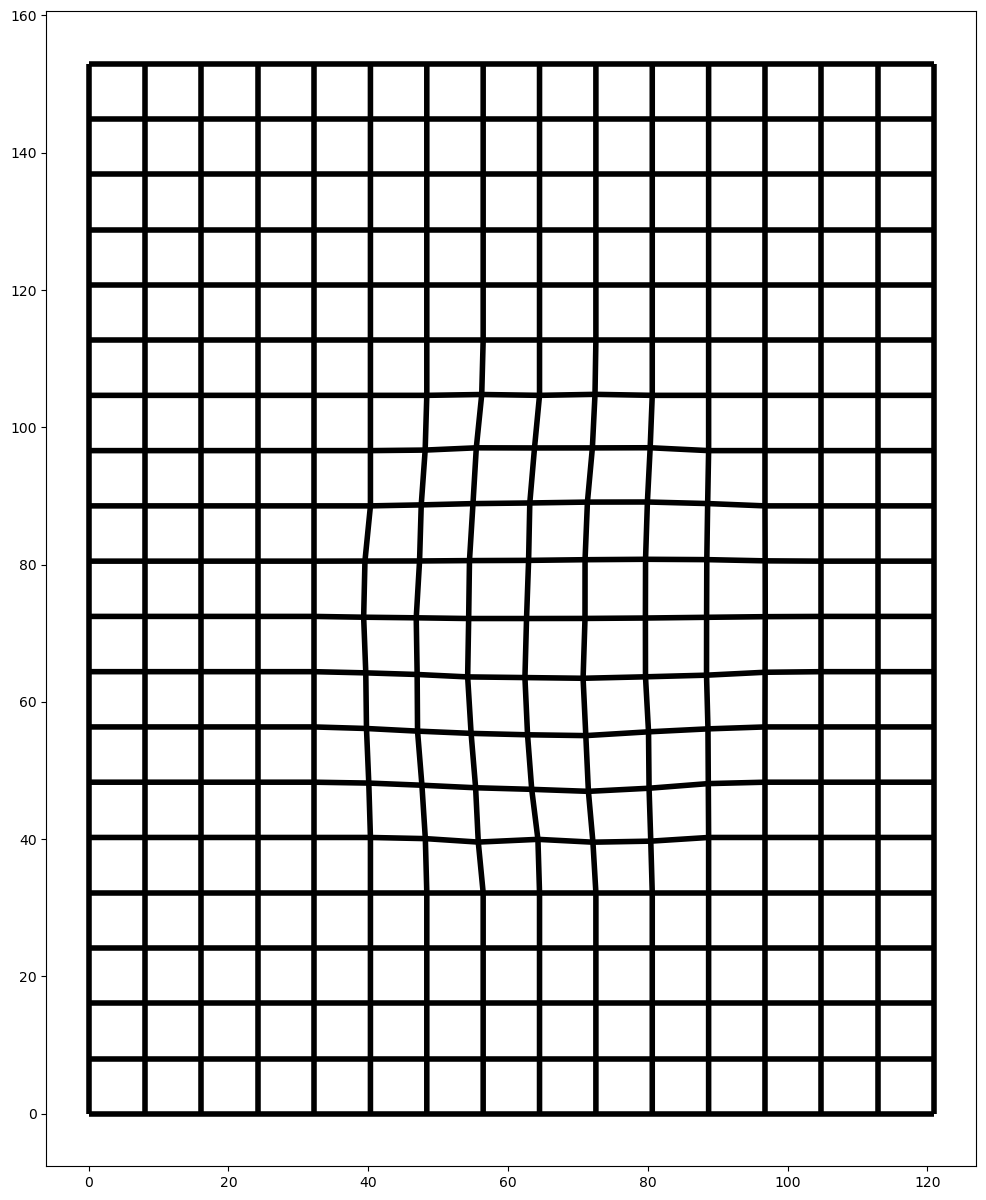

In [9]:
from matplotlib.collections import LineCollection
def plot_flow(flow, z, spacing=8, ax=None):
    def plot_grid(x,y, ax=ax, **kwargs):
        ax = ax or plt.gca()
        segs1 = np.stack((x,y), axis=2)
        segs2 = segs1.transpose(1,0,2)
        ax.add_collection(LineCollection(segs1, **kwargs))
        ax.add_collection(LineCollection(segs2, **kwargs))
        ax.autoscale()

    grid_x,grid_y = np.meshgrid(np.linspace(0, flow.shape[1], flow.shape[1]), np.linspace(0, flow.shape[0], flow.shape[0]))
#     plot_grid(grid_x[::spacing, ::spacing],grid_y[::spacing, ::spacing], ax=ax,  color="lightgrey")

    distx = grid_x[::spacing, ::spacing] - flow[::spacing, ::spacing, z, 1]
    disty = grid_y[::spacing, ::spacing] - flow[::spacing, ::spacing, z, 0]
    # distx, disty = f(grid_x,grid_y)
    plot_grid(disty, distx, ax=ax, color="black", linewidths=4)
    
fig, ax = plt.subplots(figsize=(12,15))
plot_flow(flow.transpose((1,2,3,0)), spacing=8, z=100, ax=ax)

In [10]:
flow.shape

(3, 128, 160, 128)